In [34]:
import numpy as np
from qiskit import QuantumCircuit, transpile, ClassicalRegister, QuantumRegister, transpile, BasicAer
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
# Use Aer's qasm_simulator
simulator = QasmSimulator()

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])

# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)

# Draw the circuit
circuit.draw()


Total count for 00 and 11 are: {'11': 493, '00': 507}


┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [2]:
from qiskit.quantum_info import Statevector
u = Statevector([1/np.sqrt(2), 1/np.sqrt(2)])
v = Statevector([(1 + 2.0j)/3, -2/3])
w = Statevector([1/3, 2/3])
print(u)

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


In [3]:
u.draw("latex")

<IPython.core.display.Latex object>

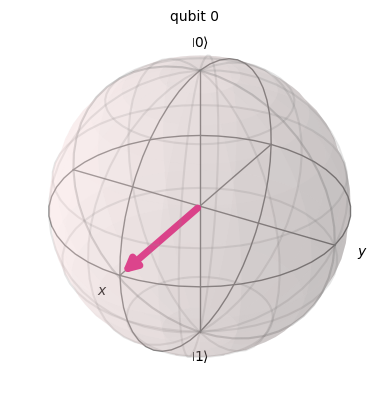

In [4]:
u.draw("bloch")

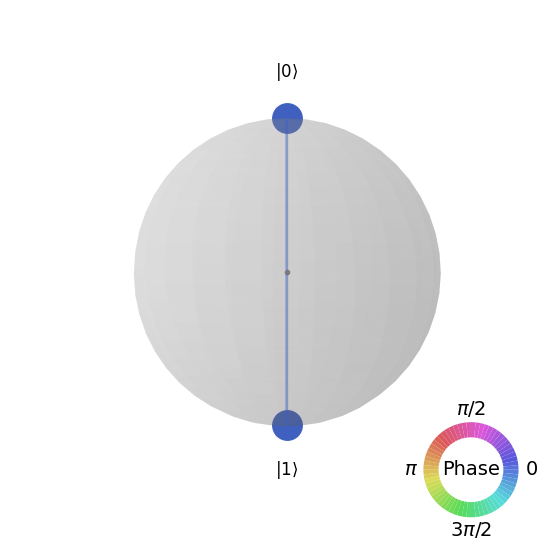

In [5]:
u.draw("qsphere")

In [6]:
u = Statevector([1/np.sqrt(2), 1/np.sqrt(2)])
v = Statevector([(1 + 2.0j)/3, -2/3])
w = Statevector([1/3, 2/3])

In [7]:
u.inner(u)

(0.9999999999999998+0j)

In [8]:
display(u.inner(v))
display(v.inner(u))

(-0.2357022603955158+0.4714045207910316j)

(-0.2357022603955158-0.4714045207910316j)

In [9]:
u.is_valid() #should have its Euclidean norm equal to 1

True

In [10]:
uu = u/2
uu.is_valid()

False

In [11]:
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
v0 = Statevector([(1 + 2.0j) / 3, 0])
v0 = v0/np.sqrt(v0.inner(v0))
v1 = Statevector([0, -2 / 3])
v1 = v1/np.sqrt(v1.inner(v1))

display(v.draw("latex"))
print(v)
display(v0.draw("latex"))
print(v0)
display(v1.draw("latex"))
print(v1)

<IPython.core.display.Latex object>

Statevector([ 0.33333333+0.66666667j, -0.66666667+0.j        ],
            dims=(2,))


<IPython.core.display.Latex object>

Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
            dims=(2,))


<IPython.core.display.Latex object>

Statevector([ 0.+0.j, -1.+0.j],
            dims=(2,))


In [12]:
v.measure()

('1',
 Statevector([ 0.+0.j, -1.+0.j],
             dims=(2,)))

In [13]:
v

Statevector([ 0.33333333+0.66666667j, -0.66666667+0.j        ],
            dims=(2,))


{'0': 555, '1': 445}

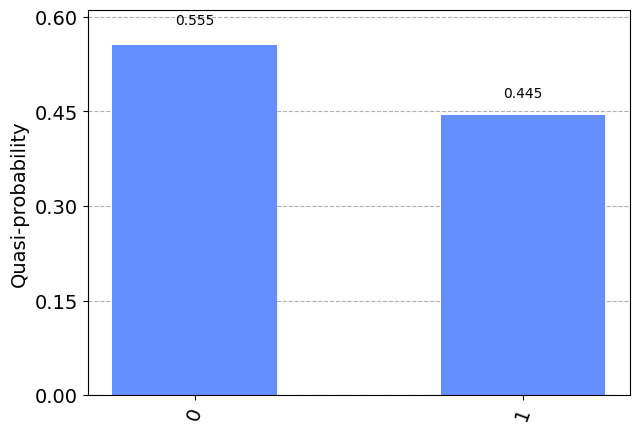

In [14]:
from qiskit.visualization import plot_distribution
statistics = v.sample_counts(1000)
display(statistics)
plot_distribution(statistics)

In [15]:
from qiskit.quantum_info import Operator
X = Operator([[0, 1], [1, 0]])
display(X)
v = Statevector([1, 0])
display(v.draw("latex"))
v = v.evolve(X)
display(v.draw("latex"))
v = v.evolve(X)
display(v.draw("latex"))


Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [16]:
X

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))

In [17]:
circuit = QuantumCircuit(1)
display(circuit.draw())

q:

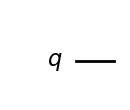

In [18]:
display(circuit.draw('mpl'))

In [19]:
circuit.h(0)
display(circuit.draw())

┌───┐
q: ┤ H ├
   └───┘

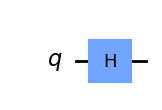

In [20]:
display(circuit.draw('mpl'))

In [21]:
circuit.t(0)
display(circuit.draw())

┌───┐┌───┐
q: ┤ H ├┤ T ├
   └───┘└───┘

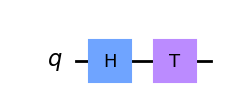

In [22]:
display(circuit.draw('mpl'))

In [23]:
ket0 = Statevector([1, 0])
v = ket0.evolve(circuit)
v.draw("text")

[0.70710678+0.j ,0.5       +0.5j]

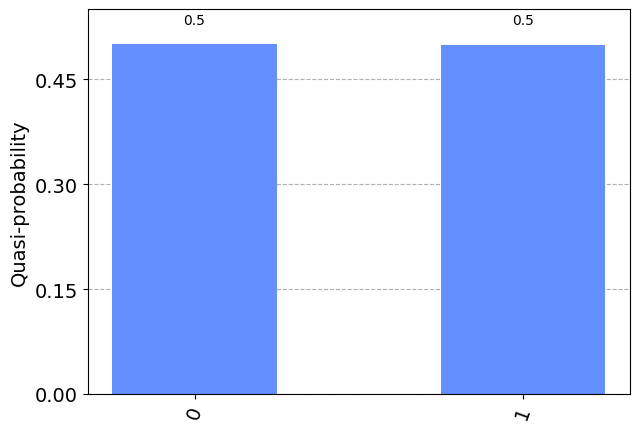

In [24]:
statistics = v.sample_counts(4000)
plot_distribution(statistics)

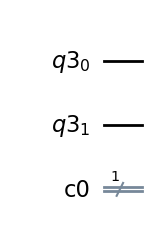

<bound method QuantumCircuit.reset of <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f5e06febf50>>

In [25]:
q = QuantumRegister(2)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
display(qc.draw("mpl"))
qc.reset

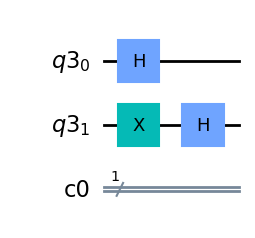

In [26]:
qc.x(1)
qc.h(1)
qc.h(0)
display(qc.draw("mpl"))

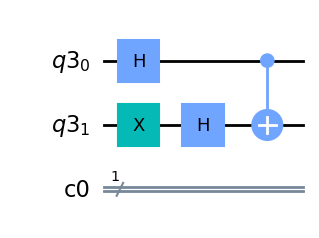

In [27]:
qc.cx(q[0], q[1])
display(qc.draw("mpl"))

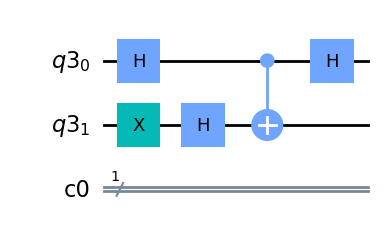

In [28]:
qc.h(0)
display(qc.draw("mpl"))

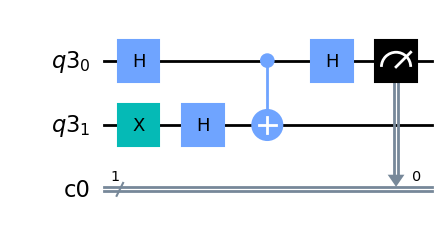

In [29]:
qc.measure(q[0],c)

display(qc.draw("mpl"))

In [30]:
backend = BasicAer.get_backend('qasm_simulator')
job = backend.run(transpile(qc, backend))
job.result().get_counts(qc)

{'1': 1024}

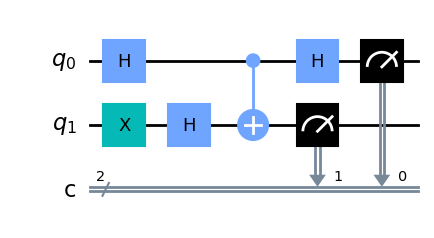

In [31]:
circ = QuantumCircuit(2,2)
circ.x(1)
circ.h(1)
circ.h(0)
circ.cx(0,1)
circ.h(0)
circ.measure([0,1],[0,1])
display(circ.draw('mpl'))

{'11': 476, '01': 548}


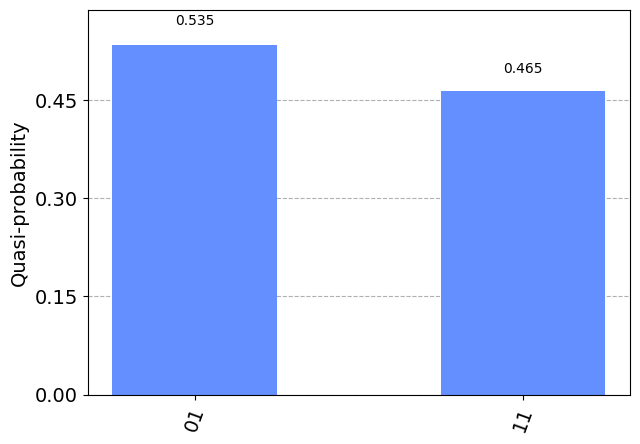

In [35]:
backend = AerSimulator()
qu_compiled = transpile(circ, backend)
job = backend.run(qu_compiled, shots = 1024)
result_sim = job.result()
counts = result_sim.get_counts(qu_compiled)
print(counts)
plot_distribution(counts)
